# Measuring Online Retail Sales Performance

by: Malva Nurina Tyagita

Project from: Rakamin

## Load Data

In [18]:
# Import libraries
import pandas as pd
import numpy as np
import re
import statistics
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Mount google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# Change the folder
%cd /content/gdrive/MyDrive/Colab Notebooks

/content/gdrive/MyDrive/Colab Notebooks


In [4]:
# Read data
df = pd.read_csv('online_retail_II.csv')

## Data Attributes

- Invoice : 6-digit invoice number assigned uniquely for each transaction. If this code starts with the letter 'C', it indicates cancellation.

- StockCode : Product code (item). A 5 digit number assigned uniquely to each different product.

- Description : Product name.

- Quantity : Total quantity of each product per transaction.

- InvoiceDate : The date and time of the invoice, i.e. the day and time the transaction was made.

- UnitPrice : Unit price or product price per unit in sterling (£).

- CustomerID : A 5-digit number that is uniquely assigned to each subscriber.

- Country : Name of the customer's country of residence.

## Data Checking

By data checking, we have a total of 1067371 rows and 8 columns of data representing the information for the Online retail sales performance for each rows. 6 columns of them have full information, and there is no nan data in it.

In [5]:
# Simple data checking
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [7]:
# First 5 rows of data
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


## Analyzing Average Income per Year

### Create New Feature: Year

Create a new column 'Year' from column 'InvoiceDate' which is still in Datetime format.

In [9]:
df.insert(5, "Year", pd.DatetimeIndex(df['InvoiceDate']).year)

### Filtering Data

Create a new variable 'sales' by filtering:
- Quantity at least 1 (cannot be 0 and minus)
- The Invoice column does not contain the letter 'C' because it indicates the customer did not complete his shopping or made a cancellation.

In [10]:
sales = df[(df['Invoice'].str.contains('C') == False) & 
                   (df['Quantity']>=1)
                   ]

### Create New Feature: Revenue

In [11]:
sales.insert(7, 'Revenue', (sales['Quantity'])*(sales['Price']))

In [13]:
# Checking new variable
sales

,Invoice,StockCode,Description,Quantity,InvoiceDate,Year,Price,Revenue,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,2009,6.95,83.40,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,2009,6.75,81.00,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,2009,6.75,81.00,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2009,2.10,100.80,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,2009,1.25,30.00,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2011,2.10,12.60,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,2011,4.15,16.60,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,2011,4.15,16.60,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,2011,4.95,14.85,12680.0,France


### Average of Revenue per Year

From the results of the average output of Revenue per year, the average Revenue increases every year, starting from 2009 to 2011.

In [14]:
sales1 = sales.groupby(['Year']).agg({'Revenue': 'mean'}).reset_index()
print(sales1)

   Year    Revenue
0  2009  18.713273
1  2010  19.908987
2  2011  20.058767


Text(0, 0.5, 'Mean Revenue')

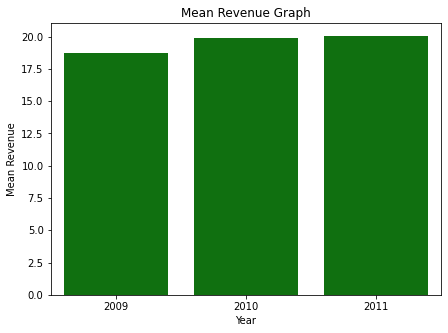

In [26]:
# Visualization
fig, ax = plt.subplots(figsize=(7,5))
sns.barplot(data=sales1, x = 'Year',y='Revenue',
                color='green')
ax.set_title('Mean Revenue Graph')
ax.set_ylabel('Mean Revenue')


## Analyzing Customer Transactions Per Year

### Filtering Data 

#### Customers who finished their purchases

Filtering using 'sales' data provided that the CustomerID cannot be empty or null. Then save it in 'finished' variable.

In [24]:
finished = sales[(sales['Customer ID']!=0)]
finished

,Invoice,StockCode,Description,Quantity,InvoiceDate,Year,Price,Revenue,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,2009,6.95,83.40,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,2009,6.75,81.00,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,2009,6.75,81.00,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2009,2.10,100.80,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,2009,1.25,30.00,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2011,2.10,12.60,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,2011,4.15,16.60,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,2011,4.15,16.60,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,2011,4.95,14.85,12680.0,France


#### Customers who canceled their purchases

Filtering data to group customers who cancel their purchases, by detecting the Invoice column containing the letter 'C'. Then save it in a new variable named 'cancel'.

In [23]:
cancel = df[(df['Invoice'].str.contains('C') == True)]
print(cancel)

         Invoice StockCode  ... Customer ID         Country
178      C489449     22087  ...     16321.0       Australia
179      C489449    85206A  ...     16321.0       Australia
180      C489449     21895  ...     16321.0       Australia
181      C489449     21896  ...     16321.0       Australia
182      C489449     22083  ...     16321.0       Australia
...          ...       ...  ...         ...             ...
1065910  C581490     23144  ...     14397.0  United Kingdom
1067002  C581499         M  ...     15498.0  United Kingdom
1067176  C581568     21258  ...     15311.0  United Kingdom
1067177  C581569     84978  ...     17315.0  United Kingdom
1067178  C581569     20979  ...     17315.0  United Kingdom

[19494 rows x 9 columns]


### Number of Finished and Canceled Transactions Each Year

Count the number of successful transactions (from the finished variable) and the number of canceled transactions (from the cancel variable) for each year.

In [25]:
# Finished
finished_count = finished.groupby(['Year']).agg({'Quantity': 'count'}).reset_index()
print(finished_count)

   Year  Quantity
0  2009     44123
1  2010    510694
2  2011    489603


In [34]:
# Canceled
canceled_count = cancel.groupby(['Year']).agg({'Quantity': 'count'}).reset_index()
print(canceled_count)

   Year  Quantity
0  2009      1015
1  2010      9919
2  2011      8560


Text(0.5, 1.0, 'Canceled Transactions')

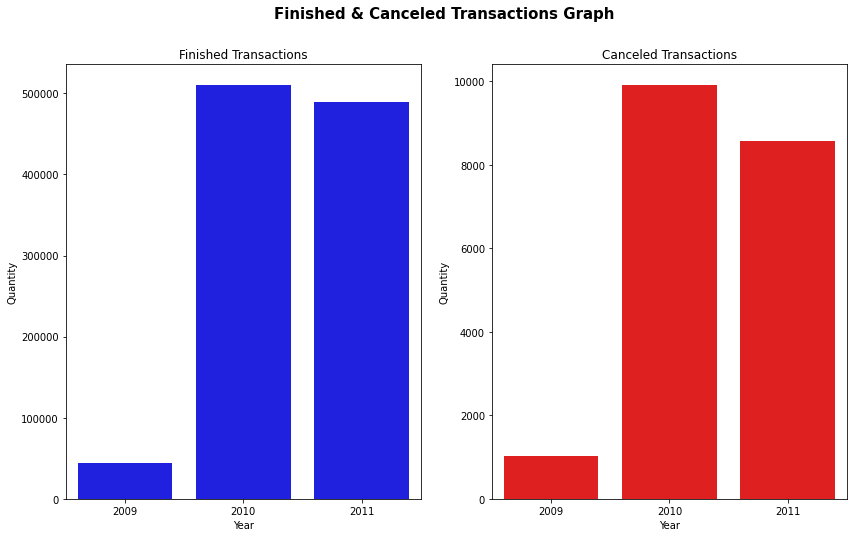

In [35]:
# Finished and canceled Visualization
fig, ax = plt.subplots(1,2,figsize=(14,8))
fig.suptitle('Finished & Canceled Transactions Graph', fontsize=15, fontweight='bold')

# subplot 1
sns.barplot(data=finished_count, x = 'Year', y='Quantity', color='blue', ax=ax[0])
ax[0].set_title('Finished Transactions')

# subplot 2
sns.barplot(data=canceled_count, x = 'Year', y='Quantity', color='red', ax=ax[1])
ax[1].set_title('Canceled Transactions')

### Cancellation Rate

Calculate the cancellation rate for each year.

Cancellation rate is the percentage of customers who cancel orders that have been made. The formula is the number of canceled customers divided by the total number of customers then multiplied by 100%.

In [36]:
cancel_cust_2009 = canceled_count['Quantity'][0]
cancel_cust_2010 = canceled_count['Quantity'][1]
cancel_cust_2011 = canceled_count['Quantity'][2]
total_cust = len(sales['Customer ID'])

cancel_rate_2009 = (cancel_cust_2009 / total_cust)*100
cancel_rate_2010 = (cancel_cust_2010 / total_cust)*100
cancel_rate_2011 = (cancel_cust_2011 / total_cust)*100

print(f'cancellation rate in 2009 is', cancel_rate_2009, '%')
print(f'cancellation rate in 2010 is', cancel_rate_2010, '%')
print(f'cancellation rate in 2011 is', cancel_rate_2011, '%')

cancellation rate in 2009 is 0.09718312556251317 %
cancellation rate in 2010 is 0.949713716704008 %
cancellation rate in 2011 is 0.8195936500641505 %


### Conclusion

- From the results of the average output of Revenue per year, the average Revenue increases every year, starting from 2009 to 2011.

- Based on the data that has been processed, the number of completed transactions is higher than the canceled transactions. Then 2010 was the year that had the most number of successful transactions as well as canceled transactions. Likewise, the highest cancellation rate was in 2010.